<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Useful-Inputs" data-toc-modified-id="Useful-Inputs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Useful Inputs</a></span></li><li><span><a href="#Obtaining-Dataset-&amp;-Train-Test-Split" data-toc-modified-id="Obtaining-Dataset-&amp;-Train-Test-Split-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Obtaining Dataset &amp; Train-Test Split</a></span></li><li><span><a href="#Creating-a-Neural-Network" data-toc-modified-id="Creating-a-Neural-Network-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Creating a Neural Network</a></span></li><li><span><a href="#Training-the-Model" data-toc-modified-id="Training-the-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training the Model</a></span></li><li><span><a href="#Evaluating-the-Trained-Model" data-toc-modified-id="Evaluating-the-Trained-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluating the Trained Model</a></span></li><li><span><a href="#Saving-it-for-later" data-toc-modified-id="Saving-it-for-later-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Saving it for later</a></span></li></ul></div>

Most of this code can be found at <a href='https://keras.io'>keras.io</a>

# Useful Inputs

In [1]:
import tensorflow as tf 
from tensorflow import keras
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import numpy as np

np.random.seed(27)

In [2]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# Obtaining Dataset & Train-Test Split

Nothing different from training other models

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
x = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the data set into training, validation, and testing
x_train, x_test, y_train, y_test = train_test_split(
                                    x_scaled, y, 
                                    test_size=0.2, random_state=2
)
cut_off = int(len(x_train) * 0.9)

x_valid, x_train = x_train[:cut_off] , x_train[cut_off:] 
y_valid, y_train = y_train[:cut_off], y_train[cut_off:]

In [4]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Creating a Neural Network

`Sequential` is referring to the neural networks we've observed. There are other neural network models that will go beyond this class.

In [5]:
from tensorflow.keras.models import Sequential

model = Sequential()

The actual network; we can decide how many layers & nodes for each layer here as well as other hyperparameters like the activation function.

For `softmax` the network is configured to output N values, one for each class in the classification task, and the softmax function is used to normalize the outputs, converting them from weighted sum values into probabilities that sum to one. Each value in the output of the softmax function is interpreted as the probability of membership for each class.

Sigmoid would be inappropriate for a multi-classification output.

In [6]:
from tensorflow.keras.layers import Dense

model.add(Dense(units=30, activation='relu', input_dim=4))
# Use a 2nd hidden layer for more parameters & complexity
# model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

Compile the model to a form that the computer can more easily work with. Compile specifies a [loss](https://keras.io/api/losses/), [metrics](https://keras.io/api/metrics/) and [optimizer](https://keras.io/api/optimizers/) function. 

**[On optimizers](https://www.kaggle.com/residentmario/keras-optimizers):** Every time a neural network finishes passing a batch through the network and generating prediction results, it must decide how to use the difference between the results it got and the values it knows to be true to adjust the weights on the nodes so that the network steps towards a solution. The algorithm that determines that step is known as the optimization algorithm.

In [7]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True),
              metrics=['accuracy'])


/Users/amberyandow/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 93        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.layers

# Training the Model

Using the model structure, we do sequences of feedfoward and then backpropagation to adjust the weights and biases (training/fitting)

In [10]:
history = model.fit(x_train, y_train, 
                    epochs=500, #batch_size=256,
                    validation_data = (x_valid, y_valid)
                    # validation_split=0.2 # Optionally use a split here
)

Epoch 1/500
1/1 [==============================] - 1s 507ms/step - loss: 1.2004 - accuracy: 0.1667 - val_loss: 1.0371 - val_accuracy: 0.3519
Epoch 2/500
1/1 [==============================] - 0s 18ms/step - loss: 1.1970 - accuracy: 0.1667 - val_loss: 1.0345 - val_accuracy: 0.3519
Epoch 3/500
1/1 [==============================] - 0s 20ms/step - loss: 1.1921 - accuracy: 0.1667 - val_loss: 1.0313 - val_accuracy: 0.3519
Epoch 4/500
1/1 [==============================] - 0s 21ms/step - loss: 1.1860 - accuracy: 0.1667 - val_loss: 1.0274 - val_accuracy: 0.3519
Epoch 5/500
1/1 [==============================] - 0s 20ms/step - loss: 1.1787 - accuracy: 0.1667 - val_loss: 1.0230 - val_accuracy: 0.3519
Epoch 6/500
1/1 [==============================] - 0s 23ms/step - loss: 1.1704 - accuracy: 0.1667 - val_loss: 1.0182 - val_accuracy: 0.3519
Epoch 7/500
1/1 [==============================] - 0s 23ms/step - loss: 1.1614 - accuracy: 0.1667 - val_loss: 1.0130 - val_accuracy: 0.3519
Epoch 8/500
1/1 [==

1/1 [==============================] - 0s 24ms/step - loss: 0.6712 - accuracy: 0.8333 - val_loss: 0.7483 - val_accuracy: 0.7870
Epoch 60/500
1/1 [==============================] - 0s 21ms/step - loss: 0.6659 - accuracy: 0.8333 - val_loss: 0.7453 - val_accuracy: 0.7963
Epoch 61/500
1/1 [==============================] - 0s 23ms/step - loss: 0.6607 - accuracy: 0.8333 - val_loss: 0.7423 - val_accuracy: 0.8148
Epoch 62/500
1/1 [==============================] - 0s 23ms/step - loss: 0.6557 - accuracy: 0.8333 - val_loss: 0.7393 - val_accuracy: 0.8148
Epoch 63/500
1/1 [==============================] - 0s 23ms/step - loss: 0.6507 - accuracy: 0.8333 - val_loss: 0.7364 - val_accuracy: 0.8426
Epoch 64/500
1/1 [==============================] - 0s 23ms/step - loss: 0.6459 - accuracy: 0.8333 - val_loss: 0.7336 - val_accuracy: 0.8519
Epoch 65/500
1/1 [==============================] - 0s 23ms/step - loss: 0.6412 - accuracy: 0.8333 - val_loss: 0.7308 - val_accuracy: 0.8519
Epoch 66/500
1/1 [========

1/1 [==============================] - 0s 19ms/step - loss: 0.4873 - accuracy: 1.0000 - val_loss: 0.6310 - val_accuracy: 0.9259
Epoch 118/500
1/1 [==============================] - 0s 19ms/step - loss: 0.4854 - accuracy: 1.0000 - val_loss: 0.6296 - val_accuracy: 0.9259
Epoch 119/500
1/1 [==============================] - 0s 18ms/step - loss: 0.4836 - accuracy: 1.0000 - val_loss: 0.6283 - val_accuracy: 0.9259
Epoch 120/500
1/1 [==============================] - 0s 21ms/step - loss: 0.4818 - accuracy: 1.0000 - val_loss: 0.6269 - val_accuracy: 0.9167
Epoch 121/500
1/1 [==============================] - 0s 18ms/step - loss: 0.4800 - accuracy: 1.0000 - val_loss: 0.6255 - val_accuracy: 0.9167
Epoch 122/500
1/1 [==============================] - 0s 19ms/step - loss: 0.4782 - accuracy: 1.0000 - val_loss: 0.6242 - val_accuracy: 0.9167
Epoch 123/500
1/1 [==============================] - 0s 19ms/step - loss: 0.4764 - accuracy: 1.0000 - val_loss: 0.6228 - val_accuracy: 0.9074
Epoch 124/500
1/1 [=

Epoch 175/500
1/1 [==============================] - 0s 23ms/step - loss: 0.4066 - accuracy: 1.0000 - val_loss: 0.5652 - val_accuracy: 0.9259
Epoch 176/500
1/1 [==============================] - 0s 23ms/step - loss: 0.4056 - accuracy: 1.0000 - val_loss: 0.5643 - val_accuracy: 0.9167
Epoch 177/500
1/1 [==============================] - 0s 21ms/step - loss: 0.4045 - accuracy: 1.0000 - val_loss: 0.5634 - val_accuracy: 0.9167
Epoch 178/500
1/1 [==============================] - 0s 22ms/step - loss: 0.4035 - accuracy: 1.0000 - val_loss: 0.5624 - val_accuracy: 0.9074
Epoch 179/500
1/1 [==============================] - 0s 23ms/step - loss: 0.4024 - accuracy: 1.0000 - val_loss: 0.5615 - val_accuracy: 0.9074
Epoch 180/500
1/1 [==============================] - 0s 23ms/step - loss: 0.4014 - accuracy: 1.0000 - val_loss: 0.5606 - val_accuracy: 0.9074
Epoch 181/500
1/1 [==============================] - 0s 19ms/step - loss: 0.4004 - accuracy: 1.0000 - val_loss: 0.5597 - val_accuracy: 0.9074
Epoch 

Epoch 233/500
1/1 [==============================] - 0s 19ms/step - loss: 0.3542 - accuracy: 1.0000 - val_loss: 0.5173 - val_accuracy: 0.9074
Epoch 234/500
1/1 [==============================] - 0s 19ms/step - loss: 0.3534 - accuracy: 1.0000 - val_loss: 0.5166 - val_accuracy: 0.9074
Epoch 235/500
1/1 [==============================] - 0s 19ms/step - loss: 0.3527 - accuracy: 1.0000 - val_loss: 0.5158 - val_accuracy: 0.9074
Epoch 236/500
1/1 [==============================] - 0s 18ms/step - loss: 0.3519 - accuracy: 1.0000 - val_loss: 0.5151 - val_accuracy: 0.9074
Epoch 237/500
1/1 [==============================] - 0s 18ms/step - loss: 0.3511 - accuracy: 1.0000 - val_loss: 0.5144 - val_accuracy: 0.9074
Epoch 238/500
1/1 [==============================] - 0s 18ms/step - loss: 0.3503 - accuracy: 1.0000 - val_loss: 0.5137 - val_accuracy: 0.9074
Epoch 239/500
1/1 [==============================] - 0s 18ms/step - loss: 0.3496 - accuracy: 1.0000 - val_loss: 0.5129 - val_accuracy: 0.9074
Epoch 

Epoch 291/500
1/1 [==============================] - 0s 19ms/step - loss: 0.3140 - accuracy: 1.0000 - val_loss: 0.4786 - val_accuracy: 0.8796
Epoch 292/500
1/1 [==============================] - 0s 20ms/step - loss: 0.3133 - accuracy: 1.0000 - val_loss: 0.4780 - val_accuracy: 0.8796
Epoch 293/500
1/1 [==============================] - 0s 20ms/step - loss: 0.3127 - accuracy: 1.0000 - val_loss: 0.4774 - val_accuracy: 0.8796
Epoch 294/500
1/1 [==============================] - 0s 19ms/step - loss: 0.3121 - accuracy: 1.0000 - val_loss: 0.4768 - val_accuracy: 0.8796
Epoch 295/500
1/1 [==============================] - 0s 18ms/step - loss: 0.3115 - accuracy: 1.0000 - val_loss: 0.4762 - val_accuracy: 0.8796
Epoch 296/500
1/1 [==============================] - 0s 19ms/step - loss: 0.3109 - accuracy: 1.0000 - val_loss: 0.4756 - val_accuracy: 0.8796
Epoch 297/500
1/1 [==============================] - 0s 21ms/step - loss: 0.3103 - accuracy: 1.0000 - val_loss: 0.4750 - val_accuracy: 0.8796
Epoch 

Epoch 349/500
1/1 [==============================] - 0s 20ms/step - loss: 0.2813 - accuracy: 1.0000 - val_loss: 0.4467 - val_accuracy: 0.8704
Epoch 350/500
1/1 [==============================] - 0s 21ms/step - loss: 0.2807 - accuracy: 1.0000 - val_loss: 0.4462 - val_accuracy: 0.8704
Epoch 351/500
1/1 [==============================] - 0s 20ms/step - loss: 0.2802 - accuracy: 1.0000 - val_loss: 0.4457 - val_accuracy: 0.8704
Epoch 352/500
1/1 [==============================] - 0s 19ms/step - loss: 0.2797 - accuracy: 1.0000 - val_loss: 0.4452 - val_accuracy: 0.8704
Epoch 353/500
1/1 [==============================] - 0s 19ms/step - loss: 0.2792 - accuracy: 1.0000 - val_loss: 0.4447 - val_accuracy: 0.8704
Epoch 354/500
1/1 [==============================] - 0s 18ms/step - loss: 0.2787 - accuracy: 1.0000 - val_loss: 0.4442 - val_accuracy: 0.8704
Epoch 355/500
1/1 [==============================] - 0s 19ms/step - loss: 0.2782 - accuracy: 1.0000 - val_loss: 0.4437 - val_accuracy: 0.8704
Epoch 

Epoch 407/500
1/1 [==============================] - 0s 22ms/step - loss: 0.2534 - accuracy: 1.0000 - val_loss: 0.4200 - val_accuracy: 0.8704
Epoch 408/500
1/1 [==============================] - 0s 24ms/step - loss: 0.2529 - accuracy: 1.0000 - val_loss: 0.4196 - val_accuracy: 0.8704
Epoch 409/500
1/1 [==============================] - 0s 20ms/step - loss: 0.2525 - accuracy: 1.0000 - val_loss: 0.4192 - val_accuracy: 0.8704
Epoch 410/500
1/1 [==============================] - 0s 19ms/step - loss: 0.2521 - accuracy: 1.0000 - val_loss: 0.4188 - val_accuracy: 0.8704
Epoch 411/500
1/1 [==============================] - 0s 21ms/step - loss: 0.2516 - accuracy: 1.0000 - val_loss: 0.4183 - val_accuracy: 0.8704
Epoch 412/500
1/1 [==============================] - 0s 20ms/step - loss: 0.2512 - accuracy: 1.0000 - val_loss: 0.4179 - val_accuracy: 0.8704
Epoch 413/500
1/1 [==============================] - 0s 19ms/step - loss: 0.2507 - accuracy: 1.0000 - val_loss: 0.4175 - val_accuracy: 0.8704
Epoch 

Epoch 465/500
1/1 [==============================] - 0s 22ms/step - loss: 0.2289 - accuracy: 1.0000 - val_loss: 0.3975 - val_accuracy: 0.8611
Epoch 466/500
1/1 [==============================] - 0s 25ms/step - loss: 0.2286 - accuracy: 1.0000 - val_loss: 0.3971 - val_accuracy: 0.8611
Epoch 467/500
1/1 [==============================] - 0s 24ms/step - loss: 0.2282 - accuracy: 1.0000 - val_loss: 0.3968 - val_accuracy: 0.8611
Epoch 468/500
1/1 [==============================] - 0s 48ms/step - loss: 0.2278 - accuracy: 1.0000 - val_loss: 0.3964 - val_accuracy: 0.8611
Epoch 469/500
1/1 [==============================] - 0s 24ms/step - loss: 0.2274 - accuracy: 1.0000 - val_loss: 0.3960 - val_accuracy: 0.8611
Epoch 470/500
1/1 [==============================] - 0s 23ms/step - loss: 0.2270 - accuracy: 1.0000 - val_loss: 0.3957 - val_accuracy: 0.8611
Epoch 471/500
1/1 [==============================] - 0s 23ms/step - loss: 0.2266 - accuracy: 1.0000 - val_loss: 0.3953 - val_accuracy: 0.8611
Epoch 

In [11]:
# alternatively could have specified a specific batch to train on
# model.train_on_batch(x_batch, y_batch)

In [12]:
weights, biases = model.layers[0].get_weights()

print('Weights:\n', weights)
print()
print('Biases:\n', biases)

Weights:
 [[ 0.13833044 -0.30618307  0.21161954 -0.40232584  0.40874112  0.32601342
   0.30998743 -0.10565681  0.41765895 -0.09087156 -0.17173725  0.29450163
  -0.10429982 -0.5193182   0.11033151  0.34195065  0.34655607 -0.0013097
  -0.31897944  0.4021772  -0.11851886  0.39577153  0.08406683 -0.38306358
  -0.29634687 -0.4829245   0.156313    0.17784747 -0.26908016 -0.19666837]
 [-0.283151   -0.24732831  0.0202339   0.06249931  0.03863263 -0.31455502
   0.30182734 -0.43738598 -0.12106036 -0.17180431  0.11847759  0.09433369
  -0.0704611   0.16647418  0.31727564 -0.03035708 -0.16040796  0.2356114
  -0.05751481  0.11625437  0.1723105  -0.00941323  0.03681389  0.45496142
   0.10942931  0.50264496 -0.17378786  0.00193018 -0.08806556  0.08306248]
 [ 0.18700142  0.47915012  0.39443976 -0.47336102  0.21570009  0.49536654
  -0.01879044  0.11547083 -0.3810345   0.03502479  0.07241547 -0.35857585
  -0.40204936  0.01909809  0.22349674 -0.14519577 -0.27468166 -0.21874759
   0.10312782  0.2853448   0

# Evaluating the Trained Model

In [13]:
df.head()

NameError: name 'df' is not defined

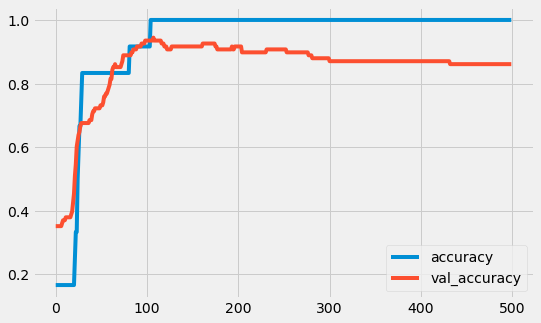

In [14]:
df = pd.DataFrame(history.history)
columns = ['accuracy', 'val_accuracy']

df[columns].plot(figsize=(8, 5))
plt.grid(True)
plt.show()

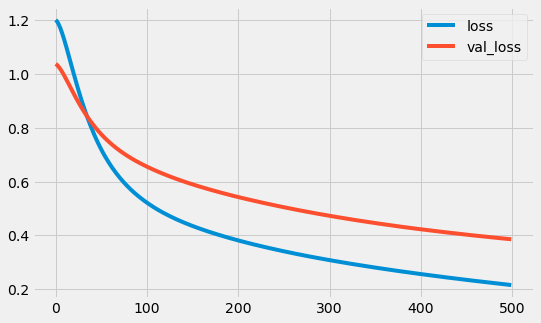

In [29]:
df = pd.DataFrame(history.history)
columns = ['loss', 'val_loss']

df[columns].plot(figsize=(8, 5))
plt.grid(True)
plt.show()

We can look at the overall loss from our test data after training the model was trained

In [17]:
# Could also just use a batch to evaluate
# loss_and_metrics = model.evaluate(x_test, y_test, batch_size=16)

loss_and_metrics = model.evaluate(x_test, y_test)

loss_and_metrics

1/1 [==============================] - 0s 15ms/step - loss: 0.3082 - accuracy: 0.8667


[0.30815601348876953, 0.8666666746139526]

We can have predictions (probability the data point is a particular class based on our trained model)

In [18]:
classes = model.predict(x_test)

classes

array([[0.9831541 , 0.0112363 , 0.00560954],
       [0.9714325 , 0.02034736, 0.00822023],
       [0.01643817, 0.5986302 , 0.38493162],
       [0.9620322 , 0.02816206, 0.00980577],
       [0.9775195 , 0.01549055, 0.00698985],
       [0.02194154, 0.5325816 , 0.44547683],
       [0.9400936 , 0.04472617, 0.01518022],
       [0.008625  , 0.5931227 , 0.39825237],
       [0.01024769, 0.40202597, 0.58772635],
       [0.95049256, 0.03584979, 0.01365758],
       [0.980515  , 0.01380033, 0.0056847 ],
       [0.98322165, 0.0115147 , 0.00526359],
       [0.96721464, 0.02318187, 0.00960355],
       [0.9779433 , 0.01591822, 0.00613848],
       [0.1607954 , 0.47261852, 0.36658615],
       [0.05099057, 0.63696986, 0.31203952],
       [0.8672658 , 0.11075184, 0.02198234],
       [0.12831622, 0.65242237, 0.21926138],
       [0.00690052, 0.19802551, 0.7950739 ],
       [0.0858281 , 0.7201202 , 0.1940517 ],
       [0.03670324, 0.5027009 , 0.46059582],
       [0.09890826, 0.6686097 , 0.2324821 ],
       [0.

We want to say what is the predicted class, so we pick just the largest probability for each result

In [19]:
predictions = np.argmax(classes, axis=1)

predictions

array([0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 1, 0, 2])

Finally, we can see how accurate our model was by seeing if the predicted classes match the actual labels. Note that this is calculated differently from how the loss is calculated.

In [20]:
np.sum(predictions  == np.argmax(y_test, axis=1)) / predictions.shape

array([0.86666667])

# Saving it for later

In [21]:
model.save("my_model.h5")

In [22]:
loaded_model = keras.models.load_model("my_model.h5")

## Review 
- function of a perceptron from inputs to outputs = `output = activation(dot(inputs, weights) + bias)`
- Forward Propagation - transformations from each node propagate to the next layers nodes. 
- Back-propagation - Updating weights and bias based on residuals 
- What is an activation function? 
- What is an optimizer? 